In [1]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import tensorflow as tf

import random

from keras import Model

from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input, Concatenate
from keras.layers import Conv2D, MaxPooling2D

from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt

import numpy as np

import os

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from ann_visualizer.visualize import ann_viz
from sklearn.metrics import confusion_matrix

In [4]:
character_readable_files = []
token_readable_files = []
character_unreadable_files = []
token_unreadable_files = []

character_readable_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\PycharmProjects\DeepCRMFYP\RankedMethods\results_1best"
token_readable_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\PycharmProjects\DeepCRMFYP\RankedMethods\results_1best"
character_unreadable_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\PycharmProjects\DeepCRMFYP\RankedMethods\results_4worst"
token_unreadable_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\PycharmProjects\DeepCRMFYP\RankedMethods\results_4worst"

readable_input_chars = []
unreadable_input_chars = []
readable_input_tokens = []
unreadable_input_tokens = []

for parent, dirnames, filenames in os.walk(character_readable_file_path):
    for filename in filenames:
        character_readable_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_readable_file_path):
    for filename in filenames:
        token_readable_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(character_unreadable_file_path):
    for filename in filenames:
        character_unreadable_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_unreadable_file_path):
    for filename in filenames:
        token_unreadable_files.append(os.path.join(parent, filename))



In [4]:
random.seed(100)
character_readable_files = random.sample(character_readable_files, k = 4000)
random.seed(100)
token_readable_files = random.sample(token_readable_files, k= 4000)
random.seed(100)
character_unreadable_files = random.sample(character_unreadable_files, k = 4000)
random.seed(100)
token_unreadable_files = random.sample(token_unreadable_files, k= 4000)

In [5]:
#Adding Scalabrino
character_readable_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\4"
token_readable_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\4"
character_unreadable_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\1"
token_unreadable_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\1"

readable_input_chars = []
unreadable_input_chars = []
readable_input_tokens = []
unreadable_input_tokens = []

for parent, dirnames, filenames in os.walk(character_readable_file_path):
    for filename in filenames:
        character_readable_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_readable_file_path):
    for filename in filenames:
        token_readable_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(character_unreadable_file_path):
    for filename in filenames:
        character_unreadable_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_unreadable_file_path):
    for filename in filenames:
        token_unreadable_files.append(os.path.join(parent, filename))



In [6]:
for file in character_readable_files:
    #input_file_object = open(file, 'r')
    #f = input_file_object.readlines()[:-1]
    matrix = []
    #for line in f:
     #   entries = []
      #  for num in line.split(','):
       #     if num != "\n":
        #        entries.append(int(num))
        #matrix.append(entries)
    with open(file, 'r') as f:
        matrix = [[int(num) for num in line.split(',') if num != "\n"][:754] for line in f ]
    readable_input_chars.append(np.array(matrix))
    #readable_input_chars.append(np.loadtxt(file, dtype='i', delimiter=','))
    
for file in token_readable_files:
    #input_file_object = open(file, 'r')
    #f = input_file_object.readlines()
    matrix = []
    #for line in f:
     #   entries = []
      #  for num in line.split(','):
       #     if num != "\n":
        #        entries.append(int(num))
        #matrix.append(entries)
    with open(file, 'r') as f:
        matrix = [[int(num) for num in line.split(',') if num != "\n"][:754] for line in f]
    readable_input_tokens.append(np.array(matrix))
    #readable_input_tokens.append(np.loadtxt(file, dtype='i', delimiter=','))

for file in character_unreadable_files:
    #input_file_object = open(file, 'r')
    #f = input_file_object.readlines()
    matrix = []
    #for line in f:
     #   entries = []
      #  for num in line.split(','):
       #     if num != "\n":
        #        entries.append(int(num))
        #matrix.append(entries)
    with open(file, 'r') as f:
        matrix = [[int(num) for num in line.split(',') if num != "\n"][:754] for line in f if line.strip() != "" ]
    unreadable_input_chars.append(np.array(matrix))    
    #unreadable_input_chars.append(np.loadtxt(file, dtype='i', delimiter=','))

for file in token_unreadable_files:
    #input_file_object = open(file, 'r')
    #f = input_file_object.readlines()
    matrix = []
    #for line in f:
     #   entries = []
      #  for num in line.split(','):
       #     if num != "\n":
        #        entries.append(int(num))
        #matrix.append(entries)
    with open(file, 'r') as f:
        matrix = [[int(num) for num in line.split(',') if num != "\n"][:754] for line in f]
    unreadable_input_tokens.append(np.array(matrix))    
    #unreadable_input_tokens.append(np.loadtxt(file, dtype='i', delimiter=','))

In [7]:
readable_input = []
unreadable_input = []

print(np.array(readable_input_tokens[0]).shape)

for char_array, token_array in zip(readable_input_chars, readable_input_tokens):
    readable_input.append(np.stack([np.array(char_array), np.array(token_array)],axis=-1))
    
      
for char_array, token_array in zip(unreadable_input_chars, unreadable_input_tokens):
    unreadable_input.append(np.stack([np.array(char_array), np.array(token_array)], axis=-1))
    

(50, 754)


In [8]:
input_x = []
input_y = []

for x in readable_input:
    input_x.append(x)
    input_y.append([0,1])

for x in unreadable_input:
    input_x.append(x)
    input_y.append([1,0])

In [9]:
input_x = np.array(input_x)
input_y = np.array(input_y)

In [10]:
print(input_x.shape)
print(input_y.shape)

(8111, 50, 754, 2)
(8111, 2)


In [11]:
input_x, input_y = shuffle(input_x, input_y, random_state=0)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(input_x, input_y, test_size = 0.2, random_state=24)

In [13]:
batch_size = 64
epochs = 6

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 754, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 752, 32)       608       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 750, 64)       18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 375, 64)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 552000)            0         
                                                                 
 dense (Dense)               (None, 64)                35328064  
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                        

In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

stacked2_fit = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/6
102/102 [==============================] - 524s 5s/step - loss: 2.7372 - accuracy: 0.8859 - val_loss: 0.1283 - val_accuracy: 0.9612
Epoch 2/6
102/102 [==============================] - 429s 4s/step - loss: 0.0852 - accuracy: 0.9703 - val_loss: 0.1213 - val_accuracy: 0.9729
Epoch 3/6
102/102 [==============================] - 432s 4s/step - loss: 0.0310 - accuracy: 0.9886 - val_loss: 0.1359 - val_accuracy: 0.9747
Epoch 4/6
102/102 [==============================] - 433s 4s/step - loss: 0.0091 - accuracy: 0.9980 - val_loss: 0.1617 - val_accuracy: 0.9735
Epoch 5/6
102/102 [==============================] - 420s 4s/step - loss: 0.0025 - accuracy: 0.9992 - val_loss: 0.1909 - val_accuracy: 0.9747
Epoch 6/6
102/102 [==============================] - 419s 4s/step - loss: 0.0077 - accuracy: 0.9997 - val_loss: 0.1571 - val_accuracy: 0.9729
Test loss: 0.1570669561624527
Test accuracy: 0.9728897213935852


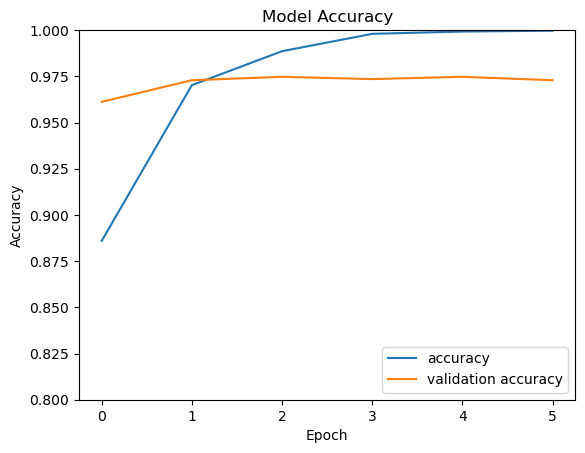

In [15]:
plt.plot(stacked2_fit.history['accuracy'], label='accuracy')
plt.plot(stacked2_fit.history['val_accuracy'], label = 'validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')

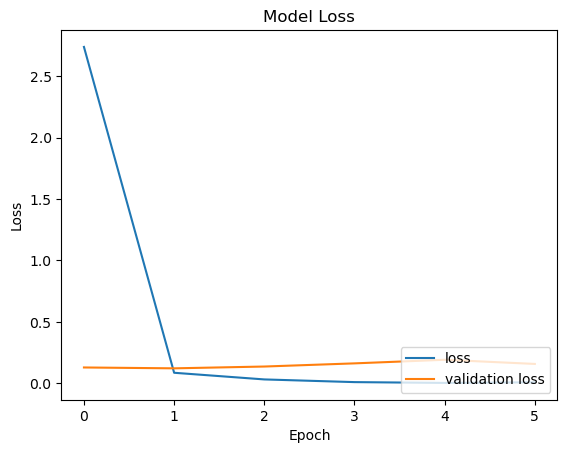

In [16]:
plt.plot(stacked2_fit.history['loss'], label='loss')
plt.plot(stacked2_fit.history['val_loss'], label = 'validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [18]:
new_predict2 = model.predict(x_test)

51/51 [==============================] - 12s 224ms/step


In [19]:
y_pred = np.argmax(new_predict2, axis=1)
y = np.argmax(y_test, axis=1)
confusion = confusion_matrix(y, y_pred)
print(confusion)

[[802  23]
 [ 21 777]]


In [ ]:
character_readable_files = []
token_readable_files = []
character_unreadable_files = []
token_unreadable_files = []

character_readable_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\Readable_scalabrino"
token_readable_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\Readable_scalabrino"
character_unreadable_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\Unreadable_scalabrino"
token_unreadable_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\Unreadable_scalabrino"

readable_input_chars = []
unreadable_input_chars = []
readable_input_tokens = []
unreadable_input_tokens = []

for parent, dirnames, filenames in os.walk(character_readable_file_path):
    for filename in filenames:
        character_readable_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_readable_file_path):
    for filename in filenames:
        token_readable_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(character_unreadable_file_path):
    for filename in filenames:
        character_unreadable_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_unreadable_file_path):
    for filename in filenames:
        token_unreadable_files.append(os.path.join(parent, filename))



In [ ]:
random.seed(100)
character_readable_files = random.sample(character_readable_files, k = 4000)
random.seed(100)
token_readable_files = random.sample(token_readable_files, k= 4000)
random.seed(100)
character_unreadable_files = random.sample(character_unreadable_files, k = 4000)
random.seed(100)
token_unreadable_files = random.sample(token_unreadable_files, k= 4000)

# Stacked

In [ ]:
for file in character_readable_files:
    #input_file_object = open(file, 'r')
    #f = input_file_object.readlines()[:-1]
    matrix = []
    #for line in f:
     #   entries = []
      #  for num in line.split(','):
       #     if num != "\n":
        #        entries.append(int(num))
        #matrix.append(entries)
    with open(file, 'r') as f:
        matrix = [[int(num) for num in line.split(',') if num != "\n"][:754] for line in f ]
    readable_input_chars.append(np.array(matrix))
    #readable_input_chars.append(np.loadtxt(file, dtype='i', delimiter=','))
    
for file in token_readable_files:
    #input_file_object = open(file, 'r')
    #f = input_file_object.readlines()
    matrix = []
    #for line in f:
     #   entries = []
      #  for num in line.split(','):
       #     if num != "\n":
        #        entries.append(int(num))
        #matrix.append(entries)
    with open(file, 'r') as f:
        matrix = [[int(num) for num in line.split(',') if num != "\n"][:754] for line in f]
    readable_input_tokens.append(np.array(matrix))
    #readable_input_tokens.append(np.loadtxt(file, dtype='i', delimiter=','))

for file in character_unreadable_files:
    #input_file_object = open(file, 'r')
    #f = input_file_object.readlines()
    matrix = []
    #for line in f:
     #   entries = []
      #  for num in line.split(','):
       #     if num != "\n":
        #        entries.append(int(num))
        #matrix.append(entries)
    with open(file, 'r') as f:
        matrix = [[int(num) for num in line.split(',') if num != "\n"][:754] for line in f if line.strip() != "" ]
    unreadable_input_chars.append(np.array(matrix))    
    #unreadable_input_chars.append(np.loadtxt(file, dtype='i', delimiter=','))

for file in token_unreadable_files:
    #input_file_object = open(file, 'r')
    #f = input_file_object.readlines()
    matrix = []
    #for line in f:
     #   entries = []
      #  for num in line.split(','):
       #     if num != "\n":
        #        entries.append(int(num))
        #matrix.append(entries)
    with open(file, 'r') as f:
        matrix = [[int(num) for num in line.split(',') if num != "\n"][:754] for line in f]
    unreadable_input_tokens.append(np.array(matrix))    
    #unreadable_input_tokens.append(np.loadtxt(file, dtype='i', delimiter=','))

In [ ]:
readable_input = []
unreadable_input = []

print(np.array(readable_input_tokens[0]).shape)

for char_array, token_array in zip(readable_input_chars, readable_input_tokens):
    readable_input.append(np.stack([np.array(char_array), np.array(token_array)],axis=-1))
    
      
for char_array, token_array in zip(unreadable_input_chars, unreadable_input_tokens):
    unreadable_input.append(np.stack([np.array(char_array), np.array(token_array)], axis=-1))
    

In [ ]:
input_x = []
input_y = []

for x in readable_input:
    input_x.append(x)
    input_y.append([0,1])

for x in unreadable_input:
    input_x.append(x)
    input_y.append([1,0])

In [ ]:
input_x = np.array(input_x)
input_y = np.array(input_y)

In [ ]:
print(input_x.shape)
print(input_y.shape)

In [ ]:
input_x, input_y = shuffle(input_x, input_y, random_state=0)

In [ ]:
score = model.evaluate(input_x, input_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

## Single Test

In [7]:
input_characters_x = []
input_characters_y = []

input_tokens_x = []
input_tokens_y = []

for x in readable_input_chars:
    input_characters_x.append(x)
    input_characters_y.append([0,1])

for x in unreadable_input_chars:
    input_characters_x.append(x)
    input_characters_y.append([1,0])



for x in readable_input_tokens:
    input_tokens_x.append(x)
    input_tokens_y.append([0,1])

for x in unreadable_input_tokens:
    input_tokens_x.append(x)
    input_tokens_y.append([1,0])

In [8]:
input_characters_x = np.array(input_characters_x)
input_characters_y = np.array(input_characters_y)

input_tokens_x = np.array(input_tokens_x)
input_tokens_y = np.array(input_tokens_y)

In [9]:
print(input_characters_x.shape)
print(input_characters_y.shape)

print(input_tokens_x.shape)
print(input_tokens_y.shape)

(8111, 50, 754)
(8111, 2)
(8111, 50, 754)
(8111, 2)


In [10]:
input_characters_x, input_characters_y = shuffle(input_characters_x, input_characters_y, random_state=0)

input_tokens_x, input_tokens_y = shuffle(input_tokens_x, input_tokens_y, random_state=0)

In [11]:
x_characters_train, x_characters_test, y_characters_train, y_characters_test = train_test_split(
    input_characters_x, input_characters_y, test_size = 0.2, random_state=24)

x_tokens_train, x_tokens_test, y_tokens_train, y_tokens_test = train_test_split(
    input_tokens_x, input_tokens_y, test_size = 0.2, random_state=24)

In [22]:
batch_size = 128
epochs = 6

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(50,754,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 752, 32)       320       
                                                                 
 conv2d_5 (Conv2D)           (None, 46, 750, 64)       18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 375, 64)      0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 23, 375, 64)       0         
                                                                 
 flatten_2 (Flatten)         (None, 552000)            0         
                                                                 
 dense_4 (Dense)             (None, 64)                35328064  
                                                      

In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Character CNN

In [17]:
character_history = model.fit(x_characters_train, y_characters_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_characters_test, y_characters_test))
score = model.evaluate(x_characters_test, y_characters_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/6
51/51 [==============================] - 562s 11s/step - loss: 4.0804 - accuracy: 0.8200 - val_loss: 0.1865 - val_accuracy: 0.9538
Epoch 2/6
51/51 [==============================] - 492s 10s/step - loss: 0.1615 - accuracy: 0.9545 - val_loss: 0.1409 - val_accuracy: 0.9661
Epoch 3/6
51/51 [==============================] - 476s 9s/step - loss: 0.1115 - accuracy: 0.9650 - val_loss: 0.1163 - val_accuracy: 0.9673
Epoch 4/6
51/51 [==============================] - 477s 9s/step - loss: 0.0932 - accuracy: 0.9726 - val_loss: 0.1260 - val_accuracy: 0.9673
Epoch 5/6
51/51 [==============================] - 468s 9s/step - loss: 0.0691 - accuracy: 0.9755 - val_loss: 0.1110 - val_accuracy: 0.9723
Epoch 6/6
51/51 [==============================] - 483s 9s/step - loss: 0.0539 - accuracy: 0.9834 - val_loss: 0.1402 - val_accuracy: 0.9729
Test loss: 0.14023008942604065
Test accuracy: 0.9728897213935852


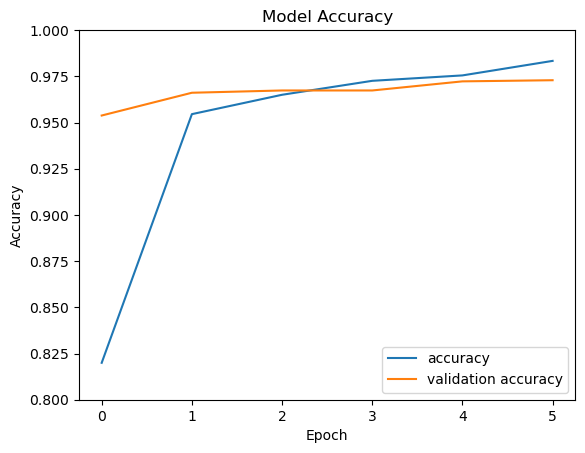

In [18]:
plt.plot(character_history.history['accuracy'], label='accuracy')
plt.plot(character_history.history['val_accuracy'], label = 'validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')

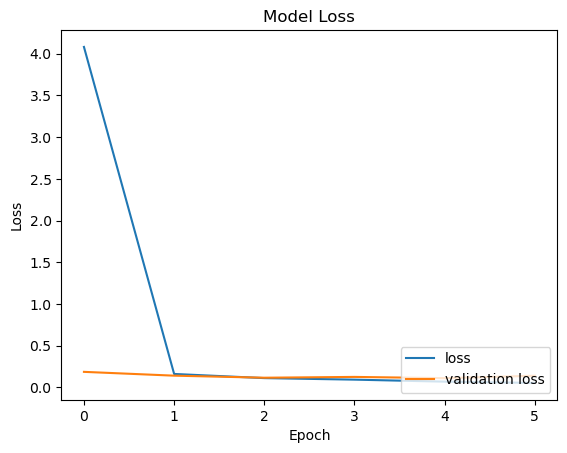

In [19]:
plt.plot(character_history.history['loss'], label='loss')
plt.plot(character_history.history['val_loss'], label = 'validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [20]:
new_predict2 = model.predict(x_characters_test)

51/51 [==============================] - 20s 387ms/step


In [21]:
y_pred = np.argmax(new_predict2, axis=1)
y = np.argmax(y_characters_test, axis=1)
confusion = confusion_matrix(y, y_pred)
print(confusion)

[[802  23]
 [ 21 777]]


In [24]:
token_fit = model.fit(x_tokens_train, y_tokens_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_tokens_test, y_tokens_test))
score = model.evaluate(x_tokens_test, y_tokens_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/6
51/51 [==============================] - 672s 13s/step - loss: 1.2596 - accuracy: 0.8943 - val_loss: 0.1471 - val_accuracy: 0.9649
Epoch 2/6
51/51 [==============================] - 619s 12s/step - loss: 0.1228 - accuracy: 0.9609 - val_loss: 0.1306 - val_accuracy: 0.9630
Epoch 3/6
51/51 [==============================] - 643s 13s/step - loss: 0.0922 - accuracy: 0.9710 - val_loss: 0.1239 - val_accuracy: 0.9680
Epoch 4/6
51/51 [==============================] - 544s 11s/step - loss: 0.0655 - accuracy: 0.9767 - val_loss: 0.1230 - val_accuracy: 0.9723
Epoch 5/6
51/51 [==============================] - 515s 10s/step - loss: 0.0471 - accuracy: 0.9837 - val_loss: 0.1701 - val_accuracy: 0.9741
Epoch 6/6
51/51 [==============================] - 493s 10s/step - loss: 0.0371 - accuracy: 0.9863 - val_loss: 0.1744 - val_accuracy: 0.9717
Test loss: 0.17442984879016876
Test accuracy: 0.971657395362854


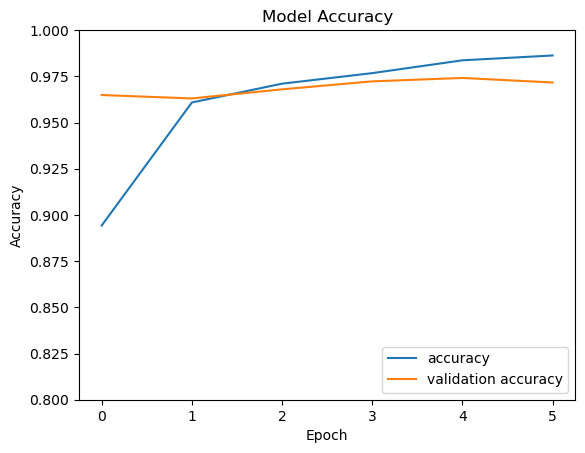

In [25]:
plt.plot(token_fit.history['accuracy'], label='accuracy')
plt.plot(token_fit.history['val_accuracy'], label = 'validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')

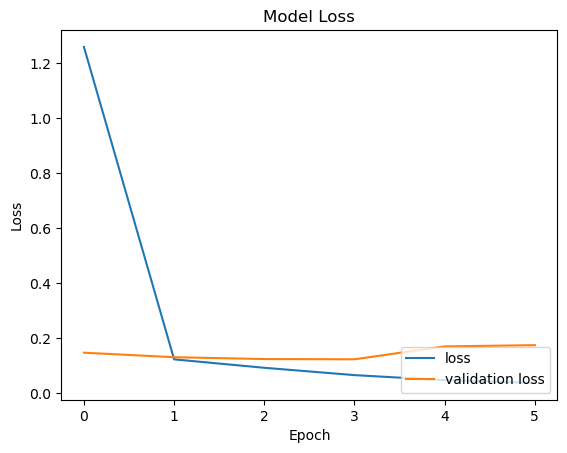

In [26]:
plt.plot(token_fit.history['loss'], label='loss')
plt.plot(token_fit.history['val_loss'], label = 'validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [27]:
new_predict2 = model.predict(x_tokens_test)

51/51 [==============================] - 19s 370ms/step


In [28]:
y_pred = np.argmax(new_predict2, axis=1)
y = np.argmax(y_tokens_test, axis=1)
confusion = confusion_matrix(y, y_pred)
print(confusion)

[[806  19]
 [ 27 771]]


In [42]:
batch_size = 64
epochs = 6

model_chars_input = Input((50,754,1))

model_chars = Conv2D(32, kernel_size=(3, 3), strides=(1,1),
                 activation='relu')(model_chars_input)
model_chars = Conv2D(64, (3, 3), strides=(1,1), activation='relu')(model_chars)
model_chars = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(model_chars)
model_chars = Dropout(0.25)(model_chars)
model_chars = Flatten()(model_chars)
model_chars = Dense(16, activation='relu')(model_chars)
model_chars = Dropout(0.5)(model_chars)

model_tokens_input = Input((50,754,1))

model_tokens = Conv2D(32, kernel_size=(3, 3), strides=(1,1),
                 activation='relu')(model_tokens_input)
model_tokens = Conv2D(64, (3, 3), strides=(1,1), activation='relu')(model_tokens)
model_tokens = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(model_tokens)
model_tokens = Dropout(0.25)(model_tokens)
model_tokens = Flatten()(model_tokens)
model_tokens = Dense(16, activation='relu')(model_tokens)
model_tokens = Dropout(0.5)(model_tokens)

merged = Concatenate()([model_chars, model_tokens])
merged = Dense(8, activation='relu')(merged)
merged = Dense(2, activation='softmax')(merged)

model_combined = Model(inputs=[model_chars_input, model_tokens_input], outputs=[merged])

print(model_combined.summary())

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 50, 754, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 input_10 (InputLayer)          [(None, 50, 754, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_22 (Conv2D)             (None, 48, 752, 32)  320         ['input_9[0][0]']                
                                                                                            

In [43]:
model_combined.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Combined Model

In [44]:
combined_fit = model_combined.fit([x_characters_train, x_tokens_train], y_characters_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=([x_characters_test, x_tokens_test], y_characters_test))
score = model_combined.evaluate([x_characters_test, x_tokens_test], y_characters_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/6
102/102 [==============================] - 1367s 13s/step - loss: 1.0380 - accuracy: 0.6893 - val_loss: 0.3219 - val_accuracy: 0.9433
Epoch 2/6
102/102 [==============================] - 1343s 13s/step - loss: 0.3848 - accuracy: 0.7953 - val_loss: 0.1499 - val_accuracy: 0.9636
Epoch 3/6
102/102 [==============================] - 1141s 11s/step - loss: 0.2726 - accuracy: 0.8628 - val_loss: 0.1540 - val_accuracy: 0.9600
Epoch 4/6
102/102 [==============================] - 1087s 11s/step - loss: 0.2221 - accuracy: 0.8884 - val_loss: 0.1474 - val_accuracy: 0.9618
Epoch 5/6
102/102 [==============================] - 1113s 11s/step - loss: 0.1995 - accuracy: 0.8989 - val_loss: 0.1292 - val_accuracy: 0.9667
Epoch 6/6
102/102 [==============================] - 1079s 11s/step - loss: 0.1795 - accuracy: 0.8980 - val_loss: 0.1144 - val_accuracy: 0.9692
Test loss: 0.11441759020090103
Test accuracy: 0.9691928625106812


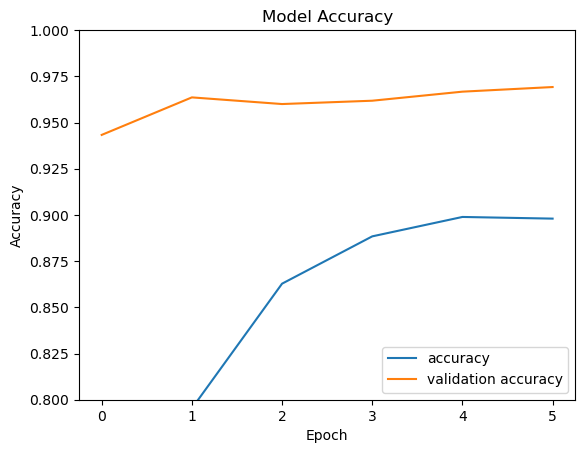

In [45]:
plt.plot(combined_fit.history['accuracy'], label='accuracy')
plt.plot(combined_fit.history['val_accuracy'], label = 'validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')

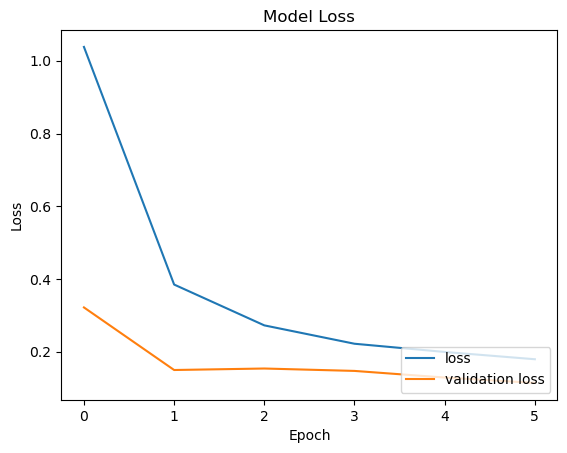

In [46]:
plt.plot(combined_fit.history['loss'], label='loss')
plt.plot(combined_fit.history['val_loss'], label = 'validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [47]:
new_predict2 = model_combined.predict([x_characters_test, x_tokens_test])

51/51 [==============================] - 31s 597ms/step


In [48]:
y_pred = np.argmax(new_predict2, axis=1)
y = np.argmax(y_characters_test, axis=1)
confusion = confusion_matrix(y, y_pred)
print(confusion)

[[798  27]
 [ 23 775]]


# 4 Tier Method Ranking

In [ ]:
#def addMatrixFiles(fileListList, filePathList):
 #   for fileList,filePathList in fileListList, filePathlist:
        

In [3]:
character_1best_files = []
token_1best_files = []
character_2mid_files = []
token_2mid_files = []
character_3mid_files = []
token_3mid_files = []
character_4worst_files = []
token_4worst_files = []

character_1best_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\PycharmProjects\DeepCRMFYP\RankedMethods\results_1best"
token_1best_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\PycharmProjects\DeepCRMFYP\RankedMethods\results_1best"

character_2mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\PycharmProjects\DeepCRMFYP\RankedMethods\results_2mid"
token_2mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\PycharmProjects\DeepCRMFYP\RankedMethods\results_2mid"

character_3mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\PycharmProjects\DeepCRMFYP\RankedMethods\results_3mid"
token_3mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\PycharmProjects\DeepCRMFYP\RankedMethods\results_3mid"

character_4worst_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\PycharmProjects\DeepCRMFYP\RankedMethods\results_4worst"
token_4worst_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\PycharmProjects\DeepCRMFYP\RankedMethods\results_4worst"

for parent, dirnames, filenames in os.walk(character_1best_file_path):
    for filename in filenames:
        character_1best_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_1best_file_path):
    for filename in filenames:
        token_1best_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(character_2mid_file_path):
    for filename in filenames:
        character_2mid_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_2mid_file_path):
    for filename in filenames:
        token_2mid_files.append(os.path.join(parent, filename))

for parent, dirnames, filenames in os.walk(character_3mid_file_path):
    for filename in filenames:
        character_3mid_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_3mid_file_path):
    for filename in filenames:
        token_3mid_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(character_4worst_file_path):
    for filename in filenames:
        character_4worst_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_4worst_file_path):
    for filename in filenames:
        token_4worst_files.append(os.path.join(parent, filename))

In [4]:
def matrixFileToMatrix(files, matrixList):
    for file in files:
        matrix = []
        with open(file, 'r') as f:
            matrix = [[float(num) for num in line.split(',') if num != "\n"][:754] for line in f ]
        matrixList.append(np.array(matrix))

In [5]:
random.seed(100)
character_1best_files = random.sample(character_1best_files, k = 2000)
random.seed(100)
token_1best_files = random.sample(token_1best_files, k= 2000)
random.seed(100)
character_2mid_files = random.sample(character_2mid_files, k = 2000)
random.seed(100)
token_2mid_files = random.sample(token_2mid_files, k= 2000)
random.seed(100)
character_3mid_files = random.sample(character_3mid_files, k = 2000)
random.seed(100)
token_3mid_files = random.sample(token_3mid_files, k= 2000)
random.seed(100)
character_4worst_files = random.sample(character_4worst_files, k = 2000)
random.seed(100)
token_4worst_files = random.sample(token_4worst_files, k= 2000)

In [6]:
#Adding Scalabrino
character_1best_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\4"
token_1best_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\4"
character_2mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\3"
token_2mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\3"

character_3mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\2"
token_3mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\2"

character_4worst_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\1"
token_4worst_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\1"

for parent, dirnames, filenames in os.walk(character_1best_file_path):
    for filename in filenames:
        character_1best_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_1best_file_path):
    for filename in filenames:
        token_1best_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(character_2mid_file_path):
    for filename in filenames:
        character_2mid_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_2mid_file_path):
    for filename in filenames:
        token_2mid_files.append(os.path.join(parent, filename))

for parent, dirnames, filenames in os.walk(character_3mid_file_path):
    for filename in filenames:
        character_3mid_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_3mid_file_path):
    for filename in filenames:
        token_3mid_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(character_4worst_file_path):
    for filename in filenames:
        character_4worst_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_4worst_file_path):
    for filename in filenames:
        token_4worst_files.append(os.path.join(parent, filename))

In [7]:
best1_input_chars = []
mid2_input_chars = []
mid3_input_chars = []
worst4_input_chars = []
best1_input_tokens = []
mid2_input_tokens = []
mid3_input_tokens = []
worst4_input_tokens = []


matrixFileToMatrix(character_1best_files, best1_input_chars)
matrixFileToMatrix(token_1best_files, best1_input_tokens)

print("done")

matrixFileToMatrix(character_2mid_files, mid2_input_chars)
matrixFileToMatrix(token_2mid_files, mid2_input_tokens)

print("done")

matrixFileToMatrix(character_3mid_files, mid3_input_chars)
matrixFileToMatrix(token_3mid_files, mid3_input_tokens)

print("done")

matrixFileToMatrix(character_4worst_files, worst4_input_chars)
matrixFileToMatrix(token_4worst_files, worst4_input_tokens)

done
done
done


In [11]:
best1_input_chars = []
mid2_input_chars = []
mid3_input_chars = []
worst4_input_chars = []
best1_input_tokens = []
mid2_input_tokens = []
mid3_input_tokens = []
worst4_input_tokens = []

# Stacked Matrices

In [8]:
best1_input_stack = []
mid2_input_stack = []
mid3_input_stack = []
worst4_input_stack = []

print(np.array(best1_input_tokens[0]).shape)

for char_array, token_array in zip(best1_input_chars, best1_input_tokens):
    best1_input_stack.append(np.stack([np.array(char_array), np.array(token_array)],axis=-1))
    
      
for char_array, token_array in zip(mid2_input_chars, mid2_input_tokens):
    mid2_input_stack.append(np.stack([np.array(char_array), np.array(token_array)], axis=-1))

for char_array, token_array in zip(mid3_input_chars, mid3_input_tokens):
    mid3_input_stack.append(np.stack([np.array(char_array), np.array(token_array)],axis=-1))
    
      
for char_array, token_array in zip(worst4_input_chars, worst4_input_tokens):
    worst4_input_stack.append(np.stack([np.array(char_array), np.array(token_array)], axis=-1))

(50, 754)


In [10]:
input4stack_x = []
input4stack_y = []

for x in best1_input_stack:
    input4stack_x.append(x)
    input4stack_y.append([0,0,0,1])

for x in mid2_input_stack:
    input4stack_x.append(x)
    input4stack_y.append([0,0,1,0])
    
for x in mid3_input_stack:
    input4stack_x.append(x)
    input4stack_y.append([0,1,0,0])

for x in worst4_input_stack:
    input4stack_x.append(x)
    input4stack_y.append([1,0,0,0])

In [11]:
input4stack_x = np.array(input4stack_x)
input4stack_y = np.array(input4stack_y)

In [12]:
print(input4stack_x.shape)
print(input4stack_y.shape)

(8200, 50, 754, 2)
(8200, 4)


In [13]:
input4stack_x, input4stack_y = shuffle(input4stack_x, input4stack_y, random_state=0)

In [14]:
x_train4s, x_test4s, y_train4s, y_test4s = train_test_split(input4stack_x, input4stack_y, test_size = 0.2, random_state=24)

In [19]:
#test
batch_size = 64
epochs = 6

model4s = Sequential()
model4s.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(50,754,2)))
model4s.add(MaxPooling2D(pool_size=(2, 2)))
model4s.add(Conv2D(64, (3, 3), activation='relu'))
model4s.add(MaxPooling2D(pool_size=(2, 2)))
model4s.add(Conv2D(128, (3, 3), activation='relu'))
model4s.add(MaxPooling2D(pool_size=(2, 2)))
model4s.add(Dropout(0.5))
model4s.add(Flatten())
model4s.add(Dense(128, activation='relu'))
model4s.add(Dropout(0.5))
model4s.add(Dense(4, activation='softmax'))

print(model4s.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 752, 32)       608       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 376, 32)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 22, 374, 64)       18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 11, 187, 64)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 9, 185, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 92, 128)      

In [15]:
batch_size = 64
epochs = 6

model4s = Sequential()
model4s.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(50,754,2)))
model4s.add(Conv2D(64, (3, 3), activation='relu'))
model4s.add(MaxPooling2D(pool_size=(2, 2)))
model4s.add(Dropout(0.25))
model4s.add(Flatten())
model4s.add(Dense(64, activation='relu'))
model4s.add(Dropout(0.5))
model4s.add(Dense(4, activation='softmax'))

print(model4s.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 752, 32)       608       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 750, 64)       18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 375, 64)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 375, 64)       0         
                                                                 
 flatten (Flatten)           (None, 552000)            0         
                                                                 
 dense (Dense)               (None, 64)                35328064  
                                                        

In [20]:
#test
model4s.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model4s.fit(x_train4s, y_train4s,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test4s, y_test4s))
score4s = model4s.evaluate(x_test4s, y_test4s, verbose=0)
print('Test loss:', score4s[0])
print('Test accuracy:', score4s[1])

Epoch 1/10
150/150 [==============================] - 104s 687ms/step - loss: 1.3025 - accuracy: 0.4869 - val_loss: 0.8764 - val_accuracy: 0.6508
Epoch 2/10
150/150 [==============================] - 107s 711ms/step - loss: 0.8912 - accuracy: 0.6321 - val_loss: 0.7319 - val_accuracy: 0.6933
Epoch 3/10
150/150 [==============================] - 109s 729ms/step - loss: 0.7753 - accuracy: 0.6840 - val_loss: 0.6851 - val_accuracy: 0.7117
Epoch 4/10
150/150 [==============================] - 114s 759ms/step - loss: 0.7504 - accuracy: 0.6865 - val_loss: 0.6561 - val_accuracy: 0.7367
Epoch 5/10
150/150 [==============================] - 115s 764ms/step - loss: 0.7406 - accuracy: 0.7185 - val_loss: 0.6510 - val_accuracy: 0.7375
Epoch 6/10
150/150 [==============================] - 125s 835ms/step - loss: 0.6831 - accuracy: 0.7267 - val_loss: 0.6553 - val_accuracy: 0.7308
Epoch 7/10
150/150 [==============================] - 116s 774ms/step - loss: 0.6310 - accuracy: 0.7385 - val_loss: 0.6480 -

In [16]:
model4s.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model4s.fit(x_train4s, y_train4s,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test4s, y_test4s))
score4s = model4s.evaluate(x_test4s, y_test4s, verbose=0)
print('Test loss:', score4s[0])
print('Test accuracy:', score4s[1])

Epoch 1/6
103/103 [==============================] - 449s 4s/step - loss: 8.3180 - accuracy: 0.3841 - val_loss: 1.0577 - val_accuracy: 0.5457
Epoch 2/6
103/103 [==============================] - 453s 4s/step - loss: 0.9978 - accuracy: 0.5566 - val_loss: 0.8195 - val_accuracy: 0.6829
Epoch 3/6
103/103 [==============================] - 447s 4s/step - loss: 0.8666 - accuracy: 0.6241 - val_loss: 0.7780 - val_accuracy: 0.6927
Epoch 4/6
103/103 [==============================] - 485s 5s/step - loss: 0.7762 - accuracy: 0.6680 - val_loss: 0.7388 - val_accuracy: 0.7159
Epoch 5/6
103/103 [==============================] - 473s 5s/step - loss: 0.7070 - accuracy: 0.7003 - val_loss: 0.7293 - val_accuracy: 0.7274
Epoch 6/6
103/103 [==============================] - 462s 4s/step - loss: 0.6290 - accuracy: 0.7331 - val_loss: 0.7090 - val_accuracy: 0.7299
Test loss: 0.7090138792991638
Test accuracy: 0.7298780679702759


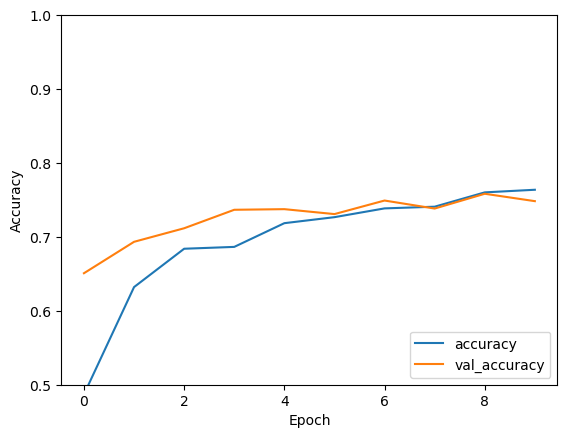

In [21]:
#test
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

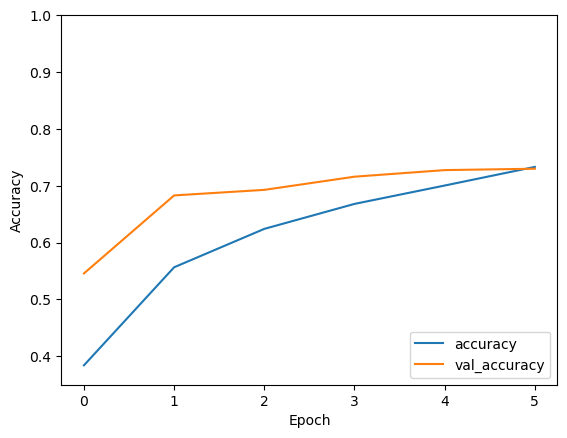

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.35, 1])
plt.legend(loc='lower right')

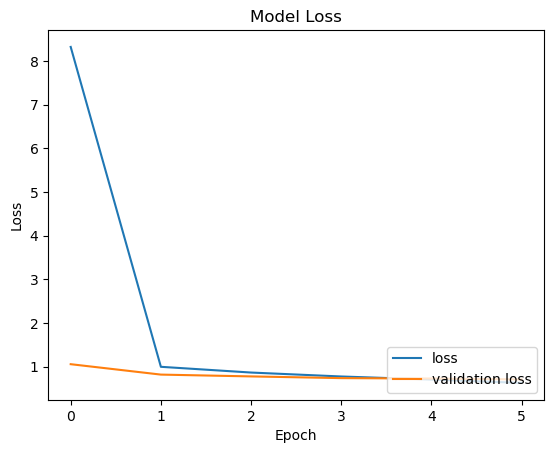

In [21]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [23]:
new_predict4 = model4s.predict(x_test4s)

52/52 [==============================] - 13s 251ms/step


In [25]:
y_pred = np.argmax(new_predict4, axis=1)
y = np.argmax(y_test4s, axis=1)
confusion = confusion_matrix(y, y_pred)
print(confusion)

[[320  67  12   2]
 [ 48 268  79  27]
 [  7  57 271  71]
 [  8  14  51 338]]


In [26]:
onemisclass = 48+57+51+67+79+71
twomisclass = 12+27+7+14
threemisclass =  8+2
misclass = [onemisclass, twomisclass, threemisclass]
print(misclass)

[373, 60, 10]


Text(0.5, 1.0, 'Misclassification by Difference between True and Predicted Classes')

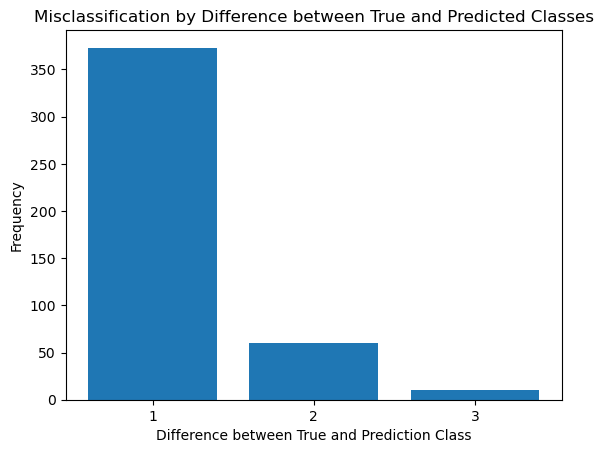

In [27]:
plt.bar(range(1,4), misclass)
plt.ylabel('Frequency')
plt.xticks(range(1,4), [1,2,3])
plt.xlabel('Difference between True and Prediction Class')
plt.title('Misclassification by Difference between True and Predicted Classes')

In [16]:
model4s.save(r"C:\Users\pauld\PycharmProjects\DeepCRMConvNet\stack4MethodModel")

INFO:tensorflow:Assets written to: C:\Users\pauld\PycharmProjects\DeepCRMConvNet\stack4MethodModel\assets


INFO:tensorflow:Assets written to: C:\Users\pauld\PycharmProjects\DeepCRMConvNet\stack4MethodModel\assets


# Single Models

In [8]:
input4_characters_x = []
input4_characters_y = []

input4_tokens_x = []
input4_tokens_y = []

for x in best1_input_chars:
    input4_characters_x.append(x)
    input4_characters_y.append([0,0,0,1])

for x in mid2_input_chars:
    input4_characters_x.append(x)
    input4_characters_y.append([0,0,1,0])
    
for x in mid3_input_chars:
    input4_characters_x.append(x)
    input4_characters_y.append([0,1,0,0])

for x in worst4_input_chars:
    input4_characters_x.append(x)
    input4_characters_y.append([1,0,0,0])



for x in best1_input_tokens:
    input4_tokens_x.append(x)
    input4_tokens_y.append([0,0,0,1])

for x in mid2_input_tokens:
    input4_tokens_x.append(x)
    input4_tokens_y.append([0,0,1,0])

for x in mid3_input_tokens:
    input4_tokens_x.append(x)
    input4_tokens_y.append([0,1,0,0])

for x in worst4_input_tokens:
    input4_tokens_x.append(x)
    input4_tokens_y.append([1,0,0,0])

In [9]:
input4_characters_x = np.array(input4_characters_x)
input4_characters_y = np.array(input4_characters_y)

input4_tokens_x = np.array(input4_tokens_x)
input4_tokens_y = np.array(input4_tokens_y)

In [10]:
print(input4_characters_x.shape)
print(input4_characters_y.shape)

print(input4_tokens_x.shape)
print(input4_tokens_y.shape)

(8200, 50, 754)
(8200, 4)
(8200, 50, 754)
(8200, 4)


In [12]:
input4_characters_x, input4_characters_y = shuffle(input4_characters_x, input4_characters_y, random_state=0)

input4_tokens_x, input4_tokens_y = shuffle(input4_tokens_x, input4_tokens_y, random_state=0)

In [13]:
x_characters_train4, x_characters_test4, y_characters_train4, y_characters_test4 = train_test_split(
    input4_characters_x, input4_characters_y, test_size = 0.2, random_state=24)

#x_characters_train4, x_characters_valid4, y_characters_train4, y_characters_valid4 = train_test_split(
 #   x_characters_train4, y_characters_train4, test_size = 0.125, random_state=24)

x_tokens_train4, x_tokens_test4, y_tokens_train4, y_tokens_test4 = train_test_split(
    input4_tokens_x, input4_tokens_y, test_size = 0.2, random_state=24)

In [22]:
batch_size = 64
epochs = 6

model4 = Sequential()
model4.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(50,754,1)))
model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))
model4.add(Flatten())
model4.add(Dense(64, activation='relu'))
#model4.add(Dense(32, activation='relu'))#test
model4.add(Dropout(0.5))
model4.add(Dense(4, activation='softmax'))

print(model4.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 48, 752, 32)       320       
                                                                 
 conv2d_3 (Conv2D)           (None, 46, 750, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 375, 64)      0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 23, 375, 64)       0         
                                                                 
 flatten_1 (Flatten)         (None, 552000)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                35328064  
                                                      

# Character Model

In [14]:
model4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

character_fit = model4.fit(x_characters_train4, y_characters_train4,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_characters_test4, y_characters_test4))
character_score = model4.evaluate(x_characters_test4, y_characters_test4, verbose=0)
print('Test loss:', character_score[0])
print('Test accuracy:', character_score[1])

Epoch 1/6
103/103 [==============================] - 506s 5s/step - loss: 4.6744 - accuracy: 0.3739 - val_loss: 0.9291 - val_accuracy: 0.6384
Epoch 2/6
103/103 [==============================] - 531s 5s/step - loss: 0.8817 - accuracy: 0.6419 - val_loss: 0.7558 - val_accuracy: 0.6866
Epoch 3/6
103/103 [==============================] - 468s 5s/step - loss: 0.7284 - accuracy: 0.7027 - val_loss: 0.7101 - val_accuracy: 0.7085
Epoch 4/6
103/103 [==============================] - 488s 5s/step - loss: 0.6379 - accuracy: 0.7398 - val_loss: 0.6988 - val_accuracy: 0.7195
Epoch 5/6
103/103 [==============================] - 509s 5s/step - loss: 0.5327 - accuracy: 0.7841 - val_loss: 0.7403 - val_accuracy: 0.7250
Epoch 6/6
103/103 [==============================] - 498s 5s/step - loss: 0.4673 - accuracy: 0.8148 - val_loss: 0.7324 - val_accuracy: 0.7335
Test loss: 0.732356607913971
Test accuracy: 0.7335366010665894


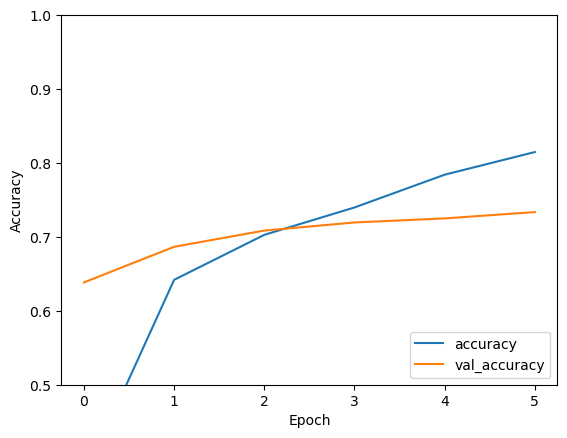

In [15]:
plt.plot(character_fit.history['accuracy'], label='accuracy')
plt.plot(character_fit.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

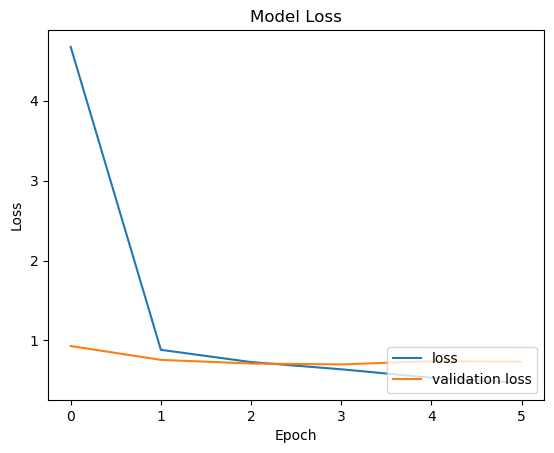

In [16]:
plt.plot(character_fit.history['loss'], label='loss')
plt.plot(character_fit.history['val_loss'], label = 'validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [17]:
new_predict4 = model4.predict(x_characters_test4)

52/52 [==============================] - 14s 263ms/step


In [18]:
y_pred = np.argmax(new_predict4, axis=1)
y = np.argmax(y_characters_test4, axis=1)
confusion = confusion_matrix(y, y_pred)
print(confusion)

[[339  50  11   1]
 [ 68 253  80  21]
 [  9  70 272  55]
 [ 10  10  52 339]]


In [20]:
onemisclass = 68+70+52+50+80+55
twomisclass = 9+6+10+11+21
threemisclass =  10+1
misclass = [onemisclass, twomisclass, threemisclass]
print(misclass)

[375, 57, 11]


Text(0.5, 1.0, 'Misclassification by Difference between True and Predicted Classes')

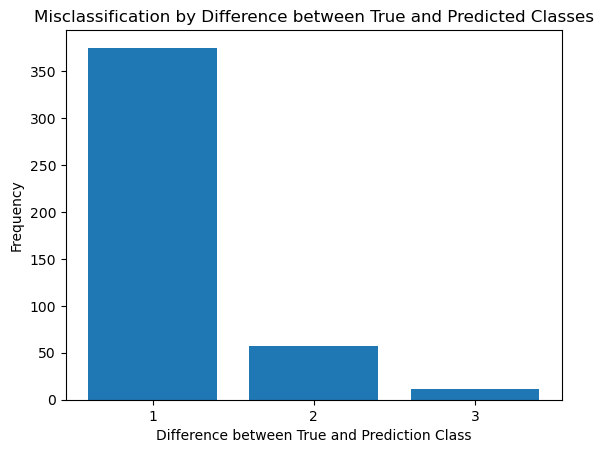

In [21]:
plt.bar(range(1,4), misclass)
plt.ylabel('Frequency')
plt.xticks(range(1,4), [1,2,3])
plt.xlabel('Difference between True and Prediction Class')
plt.title('Misclassification by Difference between True and Predicted Classes')

In [ ]:
model4.save(r"C:\Users\pauld\PycharmProjects\DeepCRMConvNet\character4MethodModel")

# Token Model

In [23]:
model4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

token_fit = model4.fit(x_tokens_train4, y_tokens_train4,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_tokens_test4, y_tokens_test4))
token_score = model4.evaluate(x_tokens_test4, y_tokens_test4, verbose=0)
print('Test loss:', token_score[0])
print('Test accuracy:', token_score[1])

Epoch 1/6
103/103 [==============================] - 481s 5s/step - loss: 3.8691 - accuracy: 0.3468 - val_loss: 1.1408 - val_accuracy: 0.4329
Epoch 2/6
103/103 [==============================] - 494s 5s/step - loss: 1.1859 - accuracy: 0.3973 - val_loss: 1.0741 - val_accuracy: 0.5335
Epoch 3/6
103/103 [==============================] - 460s 4s/step - loss: 1.0726 - accuracy: 0.5139 - val_loss: 0.9487 - val_accuracy: 0.6439
Epoch 4/6
103/103 [==============================] - 449s 4s/step - loss: 0.9479 - accuracy: 0.5913 - val_loss: 0.8895 - val_accuracy: 0.6591
Epoch 5/6
103/103 [==============================] - 450s 4s/step - loss: 0.8630 - accuracy: 0.6273 - val_loss: 0.8303 - val_accuracy: 0.6768
Epoch 6/6
103/103 [==============================] - 478s 5s/step - loss: 0.7903 - accuracy: 0.6535 - val_loss: 0.7911 - val_accuracy: 0.6994
Test loss: 0.7910895347595215
Test accuracy: 0.6993902325630188


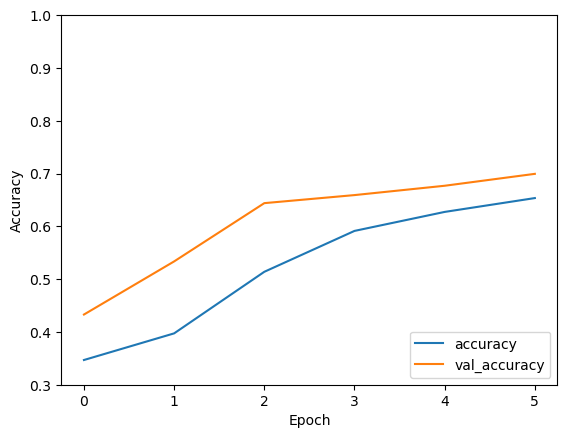

In [26]:
plt.plot(token_fit.history['accuracy'], label='accuracy')
plt.plot(token_fit.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1])
plt.legend(loc='lower right')

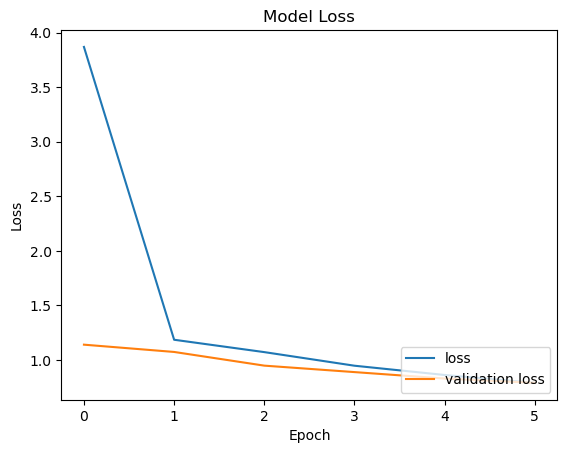

In [27]:
plt.plot(token_fit.history['loss'], label='loss')
plt.plot(token_fit.history['val_loss'], label = 'validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [29]:
new_predict4 = model4.predict(x_tokens_test4)

52/52 [==============================] - 16s 303ms/step


In [30]:
y_pred = np.argmax(new_predict4, axis=1)
y = np.argmax(y_characters_test4, axis=1)
confusion = confusion_matrix(y, y_pred)
print(confusion)

[[311  82   5   3]
 [ 50 254  93  25]
 [  5  74 263  64]
 [  7  24  61 319]]


In [35]:
onemisclass = 50+74+61+82+93+64
twomisclass = 5+24+5+25
threemisclass =  7+3
misclass = [onemisclass, twomisclass, threemisclass]
print(misclass)

[424, 59, 10]


Text(0.5, 1.0, 'Misclassification by Difference between True and Predicted Classes')

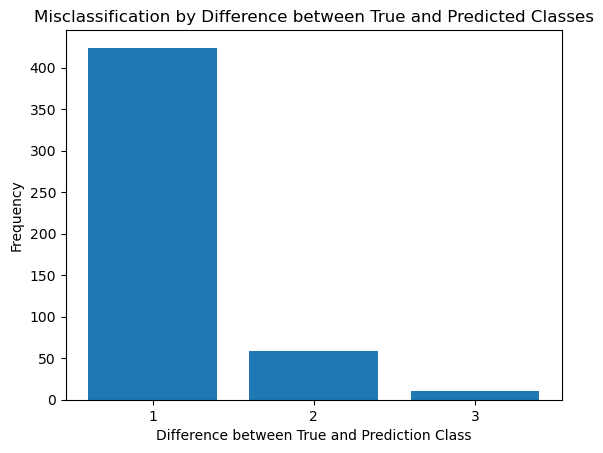

In [32]:
plt.bar(range(1,4), misclass)
plt.ylabel('Frequency')
plt.xticks(range(1,4), [1,2,3])
plt.xlabel('Difference between True and Prediction Class')
plt.title('Misclassification by Difference between True and Predicted Classes')

In [ ]:
model4.save(r"C:\Users\pauld\PycharmProjects\DeepCRMConvNet\token4MethodModel")

# Combined Model

In [14]:
batch_size = 64
epochs = 6

model_chars_input = Input((50,754,1))

model_chars = Conv2D(32, kernel_size=(3, 3), strides=(1,1),
                 activation='relu')(model_chars_input)
model_chars = Conv2D(64, (3, 3), strides=(1,1), activation='relu')(model_chars)
model_chars = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(model_chars)
model_chars = Dropout(0.25)(model_chars)
model_chars = Flatten()(model_chars)
model_chars = Dense(16, activation='relu')(model_chars)
model_chars = Dropout(0.5)(model_chars)

model_tokens_input = Input((50,754,1))

model_tokens = Conv2D(32, kernel_size=(3, 3), strides=(1,1),
                 activation='relu')(model_tokens_input)
model_tokens = Conv2D(64, (3, 3), strides=(1,1), activation='relu')(model_tokens)
model_tokens = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(model_tokens)
model_tokens = Dropout(0.25)(model_tokens)
model_tokens = Flatten()(model_tokens)
model_tokens = Dense(16, activation='relu')(model_tokens)
model_tokens = Dropout(0.5)(model_tokens)

merged = Concatenate()([model_chars, model_tokens])
merged = Dense(8, activation='relu')(merged)
merged = Dense(4, activation='softmax')(merged)

model_combined4 = Model(inputs=[model_chars_input, model_tokens_input], outputs=[merged])

print(model_combined4.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50, 754, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 input_2 (InputLayer)           [(None, 50, 754, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 48, 752, 32)  320         ['input_1[0][0]']                
                                                                                              

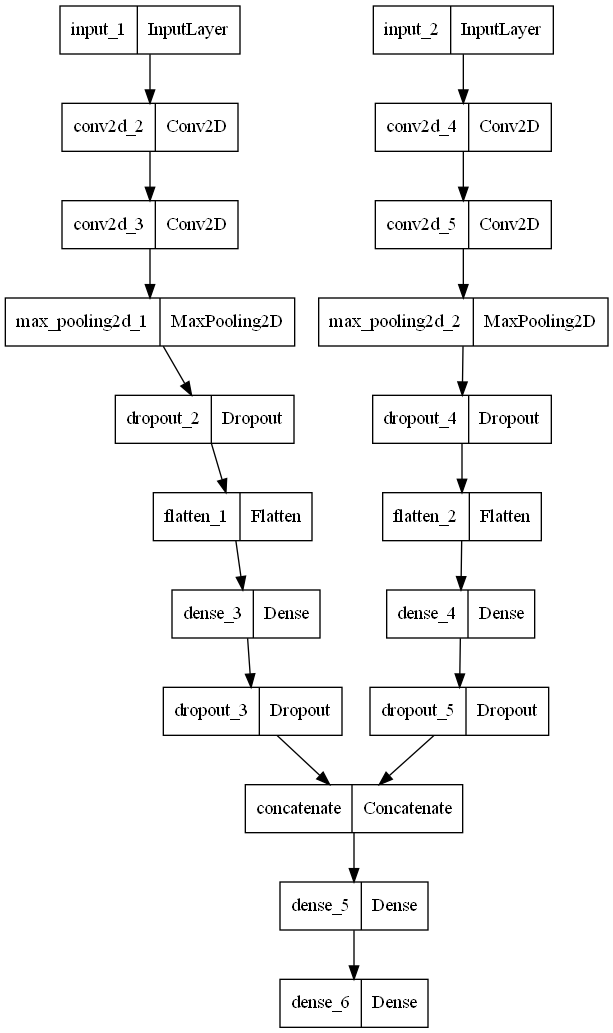

In [7]:
#ann_viz(model_combined4, view=True, filename = "methodCombinedCNN", title="CNN for Combined Representation of Methods")
tf.keras.utils.plot_model(model_combined4)

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\pauld\Anaconda3

  added / updated specs:
    - pydot


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pydot-1.4.2                |   py37haa95532_0          46 KB
    pyparsing-2.3.1            |           py37_0         100 KB
    ------------------------------------------------------------
                                           Total:         146 KB

The following NEW packages will be INSTALLED:

  pydot              pkgs/main/win-64::pydot-1.4.2-py37haa95532_0 None

The following packages will be DOWNGRADED:

  pyparsing                            3.0.9-py37haa95532_0 --> 2.3.1-py37_0 None




pydot-1.4.2          | 46 KB     |            |   0% 
pydot-1.4.2          | 46 KB     | ###4       |  35% 
pydot-1.4.2          | 46 KB     | ########## | 100% 

pyparsing-2.3.1      | 100 KB    



==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [15]:
model_combined4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

combined4_fit = model_combined4.fit([x_characters_train4, x_tokens_train4], y_characters_train4,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=([x_characters_test4, x_tokens_test4], y_characters_test4))
combined4_score = model_combined4.evaluate([x_characters_test4, x_tokens_test4], y_characters_test4, verbose=0)
print('Test loss:', combined4_score[0])
print('Test accuracy:', combined4_score[1])

Epoch 1/6
103/103 [==============================] - 874s 8s/step - loss: 2.6186 - accuracy: 0.3441 - val_loss: 1.1314 - val_accuracy: 0.5738
Epoch 2/6
103/103 [==============================] - 851s 8s/step - loss: 1.1529 - accuracy: 0.4502 - val_loss: 1.0024 - val_accuracy: 0.5848
Epoch 3/6
103/103 [==============================] - 867s 8s/step - loss: 1.0673 - accuracy: 0.5032 - val_loss: 0.8496 - val_accuracy: 0.6762
Epoch 4/6
103/103 [==============================] - 845s 8s/step - loss: 0.9873 - accuracy: 0.5314 - val_loss: 0.8111 - val_accuracy: 0.6787
Epoch 5/6
103/103 [==============================] - 845s 8s/step - loss: 0.9298 - accuracy: 0.5567 - val_loss: 0.8096 - val_accuracy: 0.6896
Epoch 6/6
103/103 [==============================] - 868s 8s/step - loss: 0.8911 - accuracy: 0.5858 - val_loss: 0.7826 - val_accuracy: 0.7128
Test loss: 0.7826047539710999
Test accuracy: 0.7128048539161682


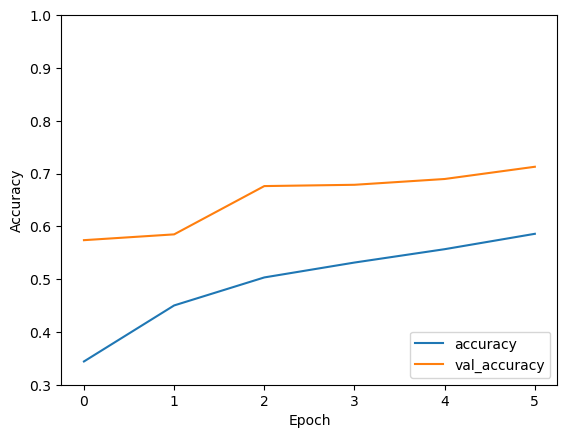

In [16]:
plt.plot(combined4_fit.history['accuracy'], label='accuracy')
plt.plot(combined4_fit.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1])
plt.legend(loc='lower right')

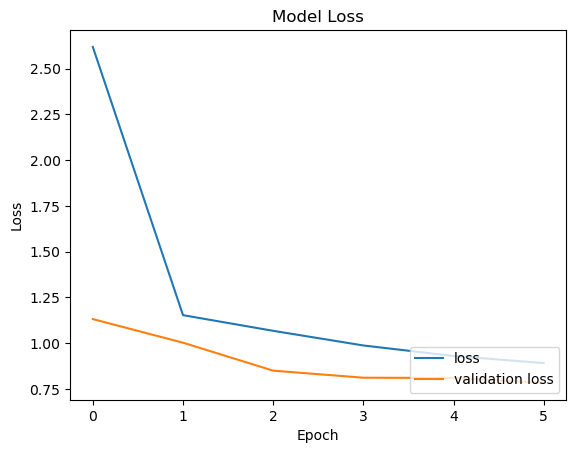

In [17]:
plt.plot(combined4_fit.history['loss'], label='loss')
plt.plot(combined4_fit.history['val_loss'], label = 'validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [18]:
new_predict4 = model_combined4.predict([x_characters_test4, x_tokens_test4])

52/52 [==============================] - 28s 537ms/step


In [19]:
y_pred = np.argmax(new_predict4, axis=1)
y = np.argmax(y_characters_test4, axis=1)
confusion = confusion_matrix(y, y_pred)
print(confusion)

[[342  50   7   2]
 [ 80 240  79  23]
 [  8  69 271  58]
 [  7  20  68 316]]


In [21]:
onemisclass = 80+69+68+50+79+58
twomisclass = 8+20+7+23
threemisclass =  7+2
misclass = [onemisclass, twomisclass, threemisclass]
print(misclass)

[404, 58, 9]


Text(0.5, 1.0, 'Misclassification by Difference between True and Predicted Classes')

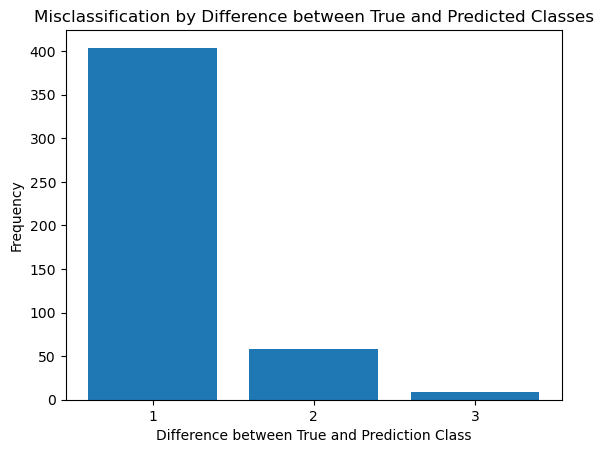

In [22]:
plt.bar(range(1,4), misclass)
plt.ylabel('Frequency')
plt.xticks(range(1,4), [1,2,3])
plt.xlabel('Difference between True and Prediction Class')
plt.title('Misclassification by Difference between True and Predicted Classes')

In [ ]:
model_combined4.save(r"C:\Users\pauld\PycharmProjects\DeepCRMConvNet\combined4MethodModel")